In [1]:
import warnings
warnings.filterwarnings('ignore')

# Support Vector Machine - SVM
É um método de aprendizagem de máquina supervisionado!

Normalmente utilizada para classificação, porém existem variáções que se valem dos princípios básicos para fazer regressões SVR.

- Funciona relativamente bem quando há uma clara margem de separação entre as classes.
- Eficaz em espaços de alta dimensão.
- Eficaz nos casos em que o número de dimensões é maior que o número de amostras.
- Relativamente eficiente quanto a memória e um pouco menos em processamento(predição em si).
- Server para detecção de outliers.

Por isso:

- Capaz de generalizar muito bem, apesar das hipóteses produzidas parecerem altamente complexas.

Porém:

- Não é adequado para grandes conjuntos de dados.
- Não funciona muito bem quando o conjunto de dados tem mais ruído, ou seja, as classes de destino estão sobrepostas.(Talvez transformações resolva?)

**Intuição gráfica**

In [2]:
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def imagem(x_ponto=None, x_marca=0, config=27, y_exibir=False):
    X, y = make_blobs(centers=4, random_state=config, n_samples=32)
    y = y % 2

    y_ = y
    if not y_exibir:
        y_ = 0
    
    _ = sns.scatterplot(x=X[:,0], y=y_, hue=y, palette={0:'red',1:'blue'},s=200, legend=False)
    _ = plt.plot([x_marca], [0], marker='s')
    
    if x_ponto:
        y = 0
        _ = plt.plot([x_ponto], y, marker='D')
        
    axes = plt.gca()
    _ = axes.set_xticklabels([])
    _ = axes.set_yticklabels([])
    axes.xaxis.grid()
    return X, y

Suponha que temos um medicamento e que os pacientes receberam doses diferentes para o estudo.  
E os vermelhos foram os que tiveram os melhores resultados, é fácil observar que se utilizarmos um treshould (quadrado) conseguimos encontrar a dose correta para nossos pacientes.

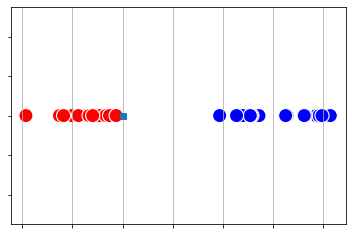

In [4]:
_ = imagem()

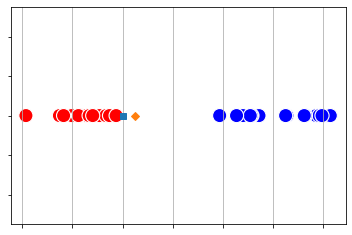

In [5]:
_ = imagem(x_ponto=0.5)

Nossa nova observaćão (losango), qual das classificaćões deveria ter?  
Olhando nosso threshold ficaria azul!!!!

Em qual local você colocaria nosso corte?

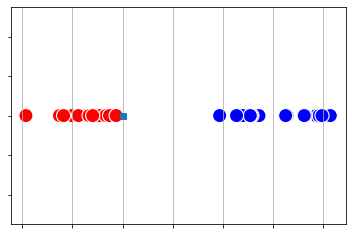

In [6]:
X, y = imagem()

In [7]:
X[:,0]

array([ 7.71082643, -2.04671097,  4.78945701,  7.82799689,  5.43100758,
        5.15046107, -2.03142496,  6.5450673 , -2.51801866, -1.28998175,
       -0.92612313,  8.11325839,  8.27204543, -1.51610606,  3.86471698,
        7.27981358, -1.27570629,  7.94252404,  7.23390512,  5.12786284,
        6.49308594, -2.3530071 ,  5.08417189,  4.537353  , -1.72296638,
       -1.76105487, -1.33556099, -0.66451524, -3.85359357, -1.19252811,
       -0.5230561 , -0.25938856])

In [8]:
y

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
df = pd.DataFrame(data={'X.x': X[:,0], 'y': y})
df.head()

,X.x,y
0,7.710826,1
1,-2.046711,0
2,4.789457,1
3,7.827997,1
4,5.431008,1


In [10]:
maior_vermelho = df[df['y'] == 0].groupby(['y']).max().values[0][0]
maior_vermelho

-0.25938855733918476

In [11]:
menor_azul = df[df['y'] == 1].groupby(['y']).min().values[0][0]
menor_azul

3.8647169761416964

In [12]:
threshold = (maior_vermelho + menor_azul) / 2
threshold

1.802664209401256

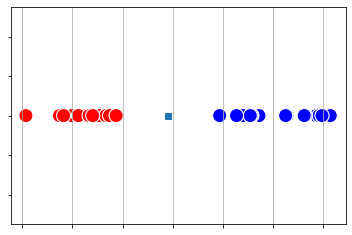

In [13]:
_ = imagem(x_marca=threshold)

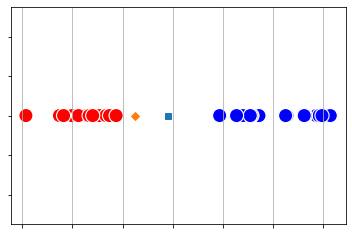

In [14]:
_ = imagem(x_ponto=0.5, x_marca=threshold)

Agora sim...

E se criarmos uma margem de segurança?

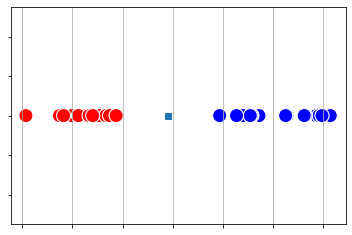

In [15]:
_ = imagem(x_marca=threshold)

In [16]:
margem_1 = threshold - maior_vermelho
margem_1

2.0620527667404405

In [17]:
margem_2 = menor_azul - threshold
margem_2

2.0620527667404405

Pensando que a margem_1 e margem_2 deve ter o mesmo tamanho...  
Aqui temos a maior margem possível, pense se o threshold variar um pouquinho ambos serão menores...
   
Quando chegamos nessa otimizacão de margem temos o Maximal-Margin Classifier

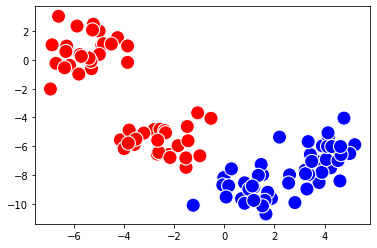

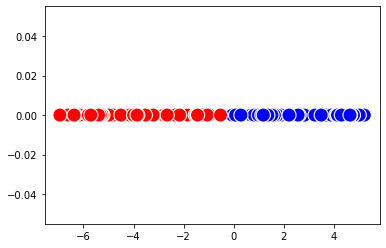

In [18]:
X, y = make_blobs(centers=4, random_state=16)
y = y % 2
_ = sns.scatterplot(X[:,0],X[:,1], hue=y, palette={0:'red',1:'blue'},s=200, legend=False)
plt.show()
_ = sns.scatterplot(X[:,0], 0, hue=y, palette={0:'red',1:'blue'},s=200, legend=False)
plt.show()

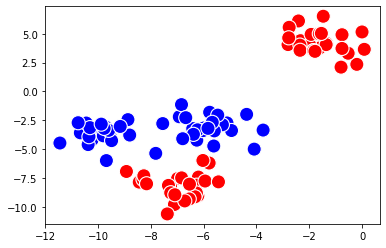

In [19]:
X, y = make_blobs(centers=4, random_state=1)
y = y % 2
_ = sns.scatterplot(X[:,0],X[:,1], hue=y, palette={0:'red',1:'blue'},s=200, legend=False)
plt.show()

Aqui temos então um modelo no qual podemos aplicar a:   
Classes Linearmente Separáveis

Observe que temos muito problemas quando temos outliers...  
Por isso temos o Soft Margin...  
Variamos as margens e minimizamos o erro...  

<img src=" 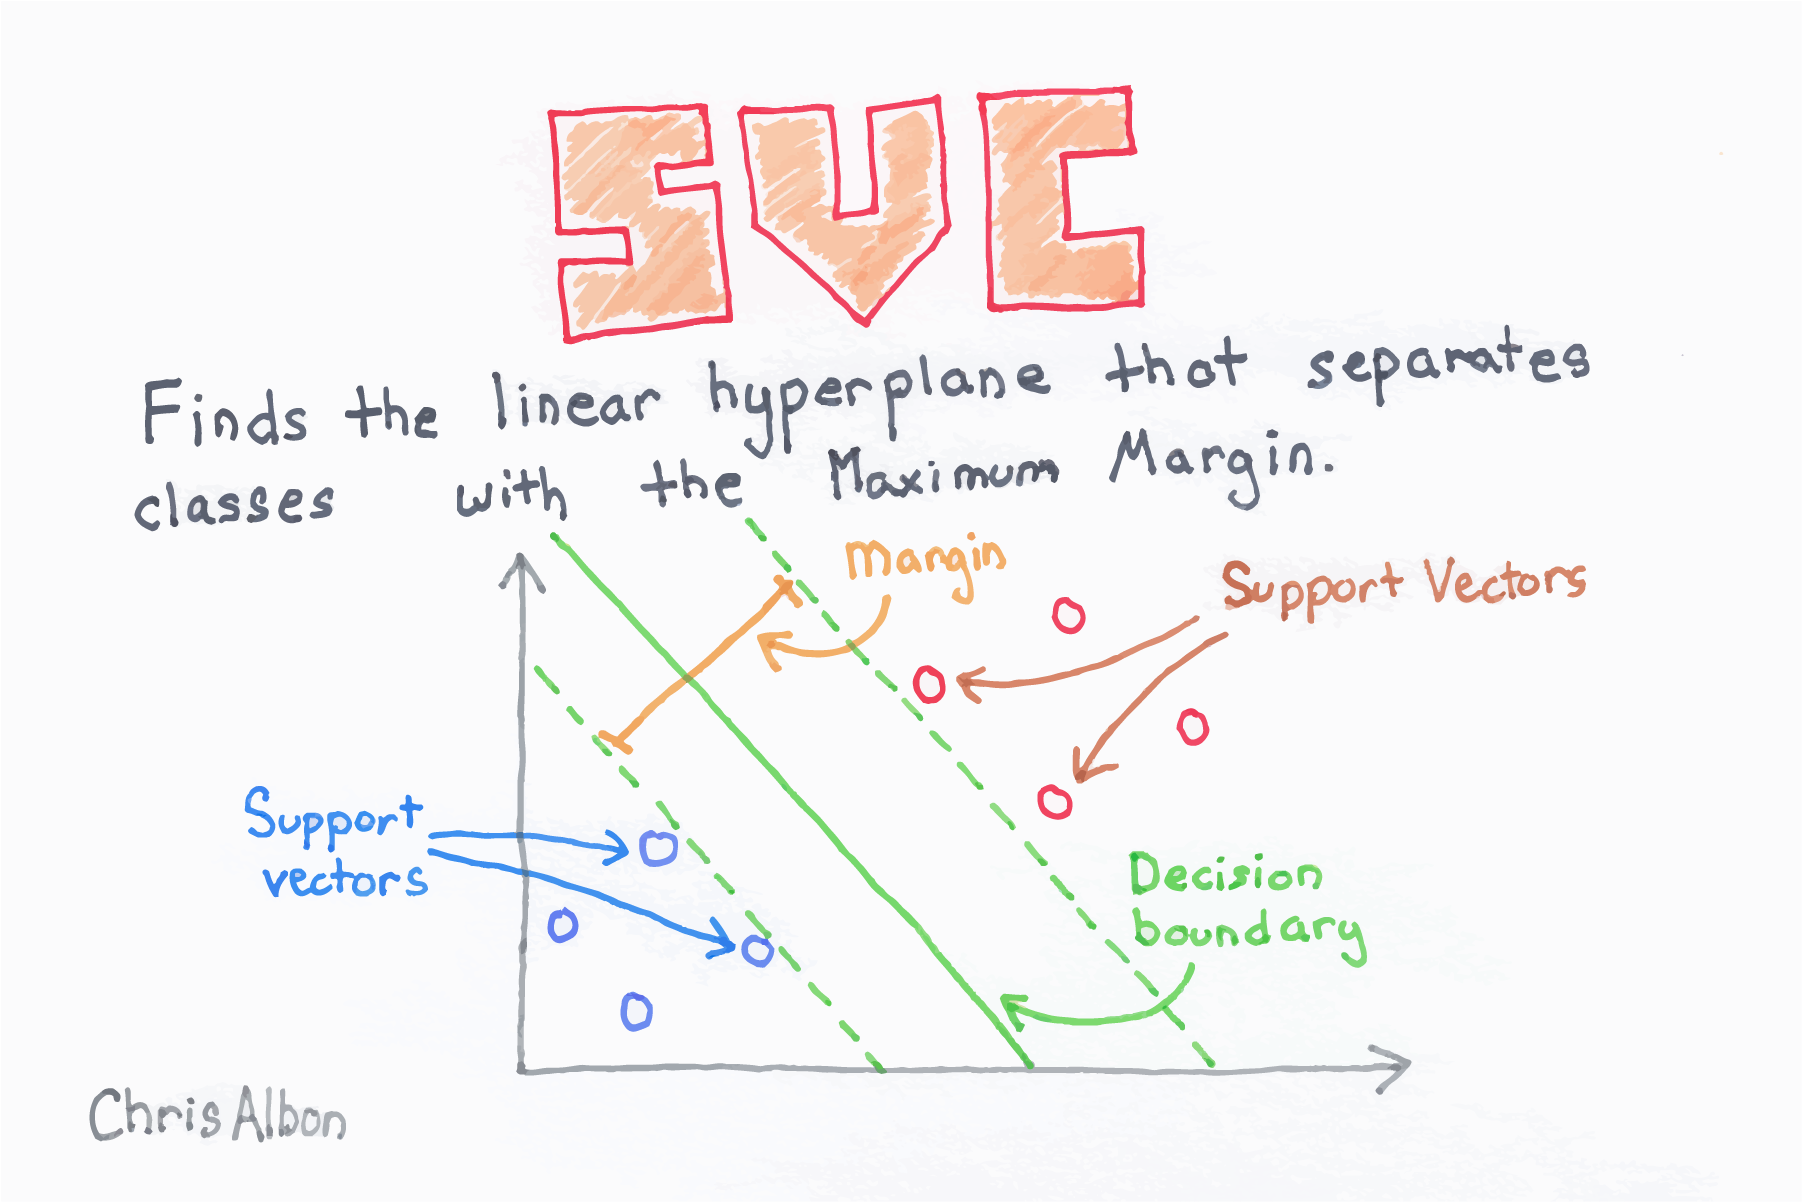" width=500 />

#### Hyperplane
Um hiperplano é um limite de decisão que separa um determinado conjunto de pontos de dados com diferentes rótulos de classe. O classificador SVM separa os pontos de dados usando um hiperplano com a quantidade máxima de margem. Esse hiperplano é conhecido como the `maximum margin hyperplanee` o classificador linear que ele define é conhecido como `maximum margin classifier`.

#### Vetores de Suporte 
Os vetores de suporte são os pontos de dados de amostra, que estão mais próximos do hiperplano. Esses pontos de dados definirão melhor a linha de separação ou o hiperplano calculando as margens.

#### Margem
Uma margem é uma lacuna de separação entre as duas linhas nos pontos de dados mais próximos. É calculado como a distância perpendicular da linha aos vetores de suporte ou pontos de dados mais próximos. Em SVMs, tentamos maximizar essa lacuna de separação para obter a margem máxima.

#### Vamos classificar com SVM:

SVMs são uma família amplamente utilizada de modelos de aprendizado de máquina, que podem resolver muitos problemas de ML , como classificação linear ou não linear, regressão ou até detecção de valores discrepantes.
  
OBS: Sua melhor aplicação vem quando aplicada à classificação de conjuntos de dados complexos de pequeno ou médio porte.
  
https://scikit-learn.org/stable/modules/svm.html

#### Observando um exemplo mais complexo, coim mais dimensão...

Considere o seguinte dataset supervisionado de um problema de classificação binário:

<img srccd8d83e07-66d8-47c6-a5e4-4a3e232481e2.PNG width=400>

É visível que os dados são linearmente separáveis. De fato, existem infinitas retas possíveis que separam perfeitamente as duas classes. Alguns exemplos:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/bbf3d0a6-4707-471b-9f19-7290c13e4f23.PNG width=400>

Vamos olhar separadamente para cada um destes três modelos:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/6c0bea51-dda9-400c-bb68-d7396e4fa606.PNG width=900>

Apesar de ambos separarem perfeitamente os dados de treino (erro de treino é nulo!), podemos nos perguntar: qual deles tem potencial de apresentar **melhor generalização?**

Para refletirmos sobre isso, considere que queremos classificar o ponto de teste indicado em preto:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/fbed2deb-bb38-4ef5-8558-99b7aff5c7b7.PNG width=900>

É super razoável que este ponto seja classificado como sendo da classe vermelha, não é mesmo? No entanto, o primeiro classificador irá classificá-lo como pertencente à classe azul.

Podemos nos perguntar: por que isso acontece?

Intuitivamente, é possível dizer que a fronteira de decisão do primeiro modelo está "**muito próxima**" dos pontos da classe vermelha, não é? 

Mas, se estamos avaliando a **fronteira de decisão**, é razoável que nos importemos, na realidade, com a proximidade entre ela **e os "pontos mais externos"** da respectiva classe, não é mesmo? Afinal, intuitivamente, estes são os pontos que exercem maior influência sobre a fornteira de decisão, justo?

É aqui que entra o conceito de **margem**:

> Chamamos de **margem** a **menor distância** entre os pontos de treino e a fronteira de decisão

A seguir, visualizamos as margens associadas a cada um dos três modelos:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/72f191fc-7bc0-4451-923a-ecb939e88111.PNG width=900>

Dada a definição de margem, fica claro que o terceiro modelo seria nossa melhor opção, pois ele **apresenta maior margem**. De fato, intuitivamente, um classificador que apresenta maior margem, terá melhores chances de generalização!

> Chamamos de **classificador de margem máxima** um classificador **linear** que é construído de modo que a margem seja maximizada.

### Classificador de margem suave

Um classificador de margem suave é obtido com uma modificação extremamente simples com relação ao classificador de margem máxima: a permissão de que **erros de classificação** sejam cometidos na base de treino! Uma possível solução seria algo assim:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/cfacd48d-9713-4bec-9fd7-ea1b4ae380f5.PNG width=400>

Neste caso, temos duas observações incorretas dentro da margem - e está tudo bem, pois dados que estas observações são outliers, não precisamos mos preocupar em ajustar a margem a elas!

Com isso, temos um modelo com um viés um pouco maior, mas com variância bem menor - caminhamos na direção do **sweet spot** de generalização!!

Note, portanto, que a introdução de uma margem suave pode ser visto como **um procedimento de regularização** aplicado ao classificador de margem! E é exatamente assim que veremos este procedimento quando chegarmos em SVM - um procedimento de regularização!

Um classificador de margem suave é também chamado de **classificador de vetores de suporte (*support vector classifier*)**, sendo que os pontos que "apoiam" a margem são justamente os chamados **vetores de suporte (*support vectors*)**.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<h2>Conclusões</h2>
<ul>
<li>Um classificador de margem máxima tem alto potencial de generalização, para dados linearmente separáveis;<br><br>
<li>Um classificador de margem suave (vetores de suporte) introduz um pouco mais de viés ao permitir erros de treino, mas, com isso, aumenta o potencial de generalização, e pode ser aplicável a dados que não são exatamente linearmente separáveis;
</ul>
</span>
<br>
</div>

Estamos chegando perto das SVMs!

Mas, antes de chegarmos lá, é importante frisarmos um ponto fundamental:

> A **fronteira de decisão** de um classificador de margem suave (de vetores de suporte) é **linear** no espaço de features em que o classificador é treinado, ou seja, a hipótese treinada (isto é, a superfície de decisão) será **um hiperplano** de dimensão $D-1$, onde $D$ é a dimensão do espaço de features

Vamos entender melhor o comentário acima com alguns exemplos:

### $D=2$

Se temos uma duas features$(X_1, X_2)$, teremos um **hiperplano $1-$dimensional**, que nada mais é que **uma reta** como fronteira de decisão:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/6ca9b6d4-90fb-4d92-8a73-42ecec09d562.PNG width=400>

### $D=3$

Se temos uma três features$(X_1, X_2, X_3)$, teremos um **hiperplano $2-$dimensional**, que nada mais é que **um plano** como fronteira de decisão:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/b91951b3-9256-4a38-abd6-287811332db8.PNG width=400>

### $D=1$

Se temos uma única feature $(X)$, teremos um **hiperplano $0-$dimensional**, que nada mais é que **um ponto** como fronteira de decisão:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/000d5eb5-25e7-485b-bf36-6ad944970e27.PNG width=400>

Para dimensões maiores, $D > 3$, não conseguimos mais visualizar a fronteira de decisão, mas, se qualquer forma, ela será linear (por isso, um hiper**plano**!).

Agora estamos prontos para introduzir as tão aguardadas **Support Vector Machines!**

## Temos um porém...

Imagine que temos o seguinte dataset (com uma única dimensão):

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/e00c77e0-14fb-472f-b9ae-f6af7b229ad5.PNG width=400>

É evidente que este dataset **não é linearmente separável**! Portanto, não conseguimos produzir um classificador de vetores de suporte para este dataset **no espaço de features original**.

Mas, aí entra uma ideia muito interessante: e se nós **levarmos os dados para um ou outro espaço?**

Seria possível que no espaço original os dados não sejam linearmente separáveis, mas **o sejam** em algum outro espaço?

Bom, a priori, vamos tentar algo bem simples... Que tal introduzirmos **uma nova feature** $X_2 = X_1^2$? O que aconteceria neste caso?

De fato, ao **introduzirmos** uma nova feature, estamos fazendo com que **cada observação passe a ser caracterizada por duas features ao invés de uma única**!

Ou seja, nosso espaço de features efetivamente muda de $\mathbb{R}^1$ para $\mathbb{R}^2$! Veja:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/8d5e6199-8a33-45cf-9e4f-c6507024fb36.PNG width=800>

O procedimento que fizemos é chamado de **feature map**, e ele é matematicamente representado pelo mapa (função) $\Phi$. 

> Como $\Phi$ leva observações do espaço original ($1$D, uma única feature $X_1$, para vetores do novo espaço ($2$D, duas features, $X_1$ e $X_2$), o denotamos como: 
$$\begin{align*}
\Phi \ \colon \ & \mathbb{R}^1 \longrightarrow \mathbb{R}^2 \\
& \vec{x} = X_1 \longmapsto \Phi(\vec{x}) = (X_1, X_2)
\end{align*}$$

Note que no caso ilustrado acima, temos $X_2 = X_1^2$, isto é, $\Phi(\vec{x}) = (X_1, X_1^2)$.

Uma vez que temos estas definições, podemos perceber a real utilidade do feature map: **os dados não eram linearmente separáveis no espaço de input, mas passaram a ser no espaço de features!**

Isso é realmente formidável, pois, se temos dados linearmente separáveis, podemos **treinar um classificador de margem suave** no espaço de features!

Isso pode parecer estranho, pois, afinal, gostaríamos de separar os dados no espaço original, não é mesmo?

Na verdade, nosso objetivo é que os dados sejam separados, **não importa em que espaço**! Se conseguirmos encontrar um espaço onde há separabilidade através da aplicação de um feature map, bastaria **aplicar o mesmo feature map** aos dados de treino e de teste, e a separabilidade sempre estará garantida!

Muito legal, não é mesmo?

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<h2>Resumindo</h2>
<ul>
<li>Se os dados não forem linearmente separáveis no espaço original ou de entrada, aplicamos transformações aos dados, que mapeiam os dados do espaço original em um espaço de recursos de dimensão superior. 
<li> O objetivo é que, após a transformação para o espaço dimensional superior, as classes sejam agora linearmente separáveis neste espaço de recursos dimensional superior . Podemos então ajustar um limite de decisão para separar as classes e fazer previsões.
<li>O limite de decisão será um hiperplano neste espaço dimensional superior.</ul>
</span>
<br>
</div>




<img src=https://s3-sa-east-1.amazonaws.com/lcpi/105e0718-f938-4d09-919a-b37f79b410f7.PNG width=400>

<img src=https://i.pinimg.com/originals/bc/6b/75/bc6b756f5bf44b54f269b2c076cff162.gif width=400>

Finalmente, agora temos todos os elementos necessários para entender o que são as SVMs:

> Uma **Support Vector Machine** nada mais é que **um classificador de margem suave** treinado **no espaço de features**. Portanto, este classificador pressupõe a aplicação prévia de um **feature map** aos dados no espaço de input.

Então esse espaço de features pode ser criado a partir de Funções:
- Linear
- Polinomial
- Base Radial
- Sigmoid

In [20]:
np.random.seed(42)

data = {'x_1': np.random.normal(0, 1, 20)}

df = pd.DataFrame(data)

df['y'] = df['x_1'].apply(lambda x: 1 if abs(x) > 1.1 else 0)

df

,x_1,y
0,0.496714,0
1,-0.138264,0
2,0.647689,0
3,1.523030,1
4,-0.234153,0
5,-0.234137,0
6,1.579213,1
7,0.767435,0
8,-0.469474,0
9,0.542560,0


In [21]:
qtde_pontos = df.shape[0]

In [22]:
y_so_para_plotar = np.zeros(qtde_pontos)
y_so_para_plotar
# 20 zeros

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

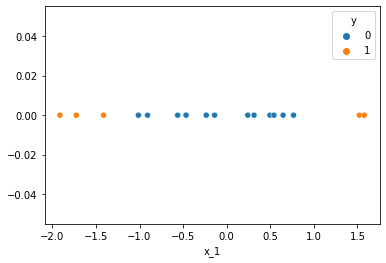

In [23]:
sns.scatterplot(data=df, x='x_1', y=y_so_para_plotar, hue='y')
plt.show()

In [24]:
df['x_2'] = df['x_1'] ** 2

In [25]:
df

,x_1,y,x_2
0,0.496714,0,0.246725
1,-0.138264,0,0.019117
2,0.647689,0,0.419500
3,1.523030,1,2.319620
4,-0.234153,0,0.054828
5,-0.234137,0,0.054820
6,1.579213,1,2.493913
7,0.767435,0,0.588956
8,-0.469474,0,0.220406
9,0.542560,0,0.294371


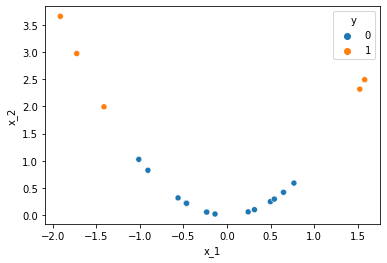

In [26]:
sns.scatterplot(data=df, x='x_1', y='x_2', hue='y')
plt.show()

Vamos utilizar a base German Credit Risk  
https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk

In [27]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV, StratifiedGroupKFold, train_test_split

from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, classification_report

In [28]:
!head ./datasets/german_credit_data.csv

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NA,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NA,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NA,NA,9055,36,education,good
6,53,male,2,own,quite rich,NA,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NA,3059,12,radio/TV,good


In [29]:
df = pd.read_csv('./datasets/german_credit_data.csv', index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [30]:
df['Job'].unique()

array([2, 1, 3, 0])

In [31]:
df.shape

(1000, 10)

In [32]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [33]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

<AxesSubplot:xlabel='Risk', ylabel='count'>

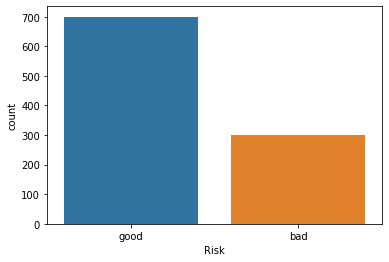

In [34]:
sns.countplot(data=df, x='Risk')

In [35]:
colunas = df.columns.tolist()
colunas

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk']

In [36]:
feat_num = ['Age', 'Credit amount', 'Duration']

feat_num_y = feat_num.copy()
feat_num_y.append('Risk')

feat_cat = colunas.copy()
feat_cat = list(set(feat_cat) - set(feat_num_y))

In [37]:
feat_num

['Age', 'Credit amount', 'Duration']

In [38]:
feat_cat

['Sex', 'Job', 'Purpose', 'Housing', 'Checking account', 'Saving accounts']

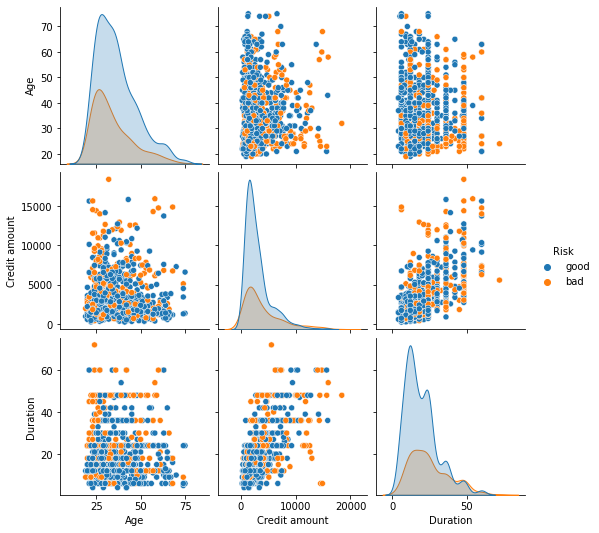

In [39]:
sns.pairplot(df[feat_num_y], hue='Risk')

In [40]:
pipe_feture_num = Pipeline([
    ('input_num', SimpleImputer(strategy='mean')),
    ('std', StandardScaler())
])

In [41]:
pipe_feture_cat = Pipeline([
    ('input_cat', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('one_hot', OneHotEncoder())
])

In [42]:
pre_processador = ColumnTransformer([
    ('trans_num', pipe_feture_num, feat_num),
    ('trans_cat', pipe_feture_cat, feat_cat)
])

In [43]:
X = df.drop(columns=['Risk'])
y = df['Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
from sklearn.svm import SVC

In [45]:
pipe_svc = Pipeline([
    ('pre_process', pre_processador),
    ('svc', SVC(random_state=42))
])

pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('trans_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['Age', 'Credit amount',
                                                   'Duration']),
                                                 ('trans_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Job', 'Purpose',
                                                   'Housing',
                                                   'Checking account',
                                                   'Saving accounts'])])),
                ('svc', SVC(random_state=42))])

In [46]:
def mostrar_metricas(estimador):
    #TODO receber dados como parametro
    print('Treino')
    y_pred_train = estimador.predict(X_train)
    print(classification_report(y_train, y_pred_train))
    
    print('Teste')
    y_pred_test = estimador.predict(X_test)
    print(classification_report(y_test, y_pred_test))

In [47]:
mostrar_metricas(pipe_svc)

Treino
              precision    recall  f1-score   support

         bad       0.86      0.46      0.60       240
        good       0.81      0.97      0.88       560

    accuracy                           0.81       800
   macro avg       0.83      0.71      0.74       800
weighted avg       0.82      0.81      0.80       800

Teste
              precision    recall  f1-score   support

         bad       0.68      0.38      0.49        60
        good       0.78      0.92      0.84       140

    accuracy                           0.76       200
   macro avg       0.73      0.65      0.67       200
weighted avg       0.75      0.76      0.74       200



Perceba que há muitos hiperparâmetros. Vale a pena estudar um pouco mais o fundo o funcionamento de cada um, e sua influência. Para algumas dicas práticas do uso de SVMs com o sklearn, [clique aqui!](https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use)

Na prática, os principais hiperparâmetros serão `C` e o `gamma` (se o kernel escolhido utilizar este parâmetro, como, por exemplo, o kernel rbf: por isso, o hiperparâmetro `kernel` também é importante!):

- `C`: é um parâmetro de regularização, relacionado com a "suavidade" da margem. Ele controla o tradeoff entre a complexidade da fronteira de decisão, e erros de classificação que são permitidos. Quanto **menor** o C, mais suave será a fronteira de decisão, pois mais erros de classificação são permitidos (isto é, a margem fica **mais larga**); quanto **maior** C, a tolerância a erros de classificação é menor (e a margem fica menos suave, mais complexa);

<img src="https://learnopencv.com/wp-content/uploads/2018/07/svm-parameter-c-example.png" width=500>

- `gamma`: define a influência que cada ponto tem na fronteira de decisão. É a "abertura" do kernel: quanto **maior** o gamma, a influência é de mais curto alcance, e vice-versa;

<img src="https://sgao323.gitbooks.io/artificial-intelligence-projects/content/assets/svm_gamma.png" width=400>

- `kernel`: as opções disponíveis são `linear`, `poly`, `rbf` e `sigmoid`, que apresentamos acima. Também é possível utilizar um kernel personalizado pré-calculado (neste caso, usamos a opção `precomputed`).


No que diz respeito a `C` e `gamma`, é importante que valores adequados sejam encontrados com o uso de Grid/Random search, usando **valores exponencialmente espaçados**.

In [ ]:
#RBF, C 1, GAMMA 5

## SVM para regressão

Embora fizemos nossa apresentação do SVM como um classificador, também é possível utilizar este método para regressão!

Todos os elementos do classificador SVM (margem, kernel, etc.) também são relevantes aqui.

A ideia é bem simples: utilização de um kernel para que um modelo de **regressão linear seja treinado no espaço de features**. No espaço de inputs, este modelo é refletido como uma regressão não-linear (da mesma forma que, no caso de classificação, fronteiras de decisão lineares no espaço de features são refletidas como fronteiras não-lineares no espaçõ de input).

A principal diferença é que o conceito de margem também está presente, de modo que **apenas alguns pontos efetivamente vão contriuir para a regressão**. Neste caso, são os pontos **dentro da margem** (região conhecida como $\epsilon-$tubo) que serão estes vetores de suporte. Ou seja, pontos que estão fora da margem não contribuem para a função de custo.

<img src=https://www.saedsayad.com/images/SVR_5.png width=600>

Uma comparação entre classificadores e regressores SVM:

<img src=https://miro.medium.com/max/1100/1*XE9jt0r1yAW8LnliQ3mllQ.png width=600>

A classe de regressores SVM no sklearn é a [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html). Vamos vê-la em ação!

In [102]:
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR

In [103]:
dados = fetch_california_housing(as_frame=True)

In [104]:
print(dados['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [105]:
df = dados['frame']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [106]:
df.shape

(20640, 9)

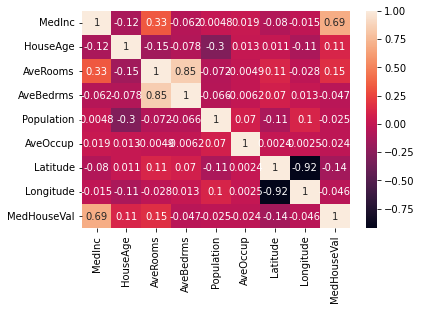

In [107]:
_ = sns.heatmap(df.corr(), annot=True)

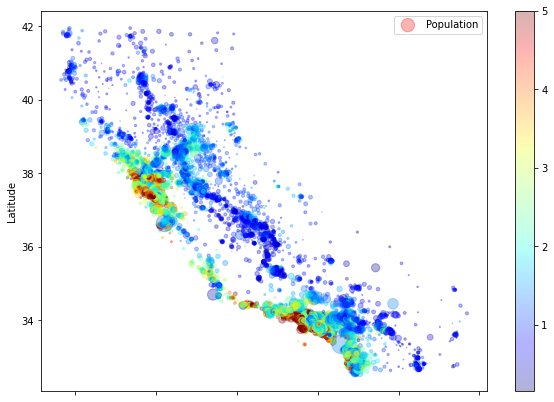

In [108]:
df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.3,
         s=df['Population']/100, label='Population',
         c=df['MedHouseVal'],    
         cmap=plt.get_cmap('jet'),      
         colorbar=True,
         figsize=(10,7))
_ = plt.legend()

In [109]:
corr_matrix = df.corr()
corr_matrix['MedHouseVal'].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

In [110]:
feat_num = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']

feat_num_y = feat_num.copy()
feat_num_y.append('MedHouseVal')

In [111]:
pipe_features_num = Pipeline([
    ('std', StandardScaler())
])

In [112]:
pre_processador = ColumnTransformer([
    ('transf_num', pipe_features_num, feat_num)
])

In [113]:
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
pipe_svr = Pipeline([
    ('pre_process', pre_processador),
    ('svr', SVR())
])

pipe_svr.fit(X_train, y_train)

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('svr', SVR())])

In [115]:
from sklearn.metrics import r2_score

def metrica_r2(model, X, y):
    y_pred = model.predict(X)
    print(r2_score(y, y_pred))

In [116]:
metrica_r2(pipe_svr, X_train, y_train)
metrica_r2(pipe_svr, X_test, y_test)

0.7485508536349368
0.7275628923016776


In [117]:
from sklearn.linear_model import LinearRegression

pipe_lr = Pipeline([
    ('pre_process', pre_processador),
    ('lr', LinearRegression())
])

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('lr', LinearRegression())])

In [118]:
metrica_r2(pipe_lr, X_train, y_train)
metrica_r2(pipe_lr, X_test, y_test)

0.6125511913966952
0.575787706032451


### Outlier Detection
  
https://scikit-learn.org/stable/modules/svm.html#svm-outlier-detection

In [119]:
from sklearn.svm import OneClassSVM

In [120]:
df_temp = df[['MedInc', 'MedHouseVal']]
df_temp.head()

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422


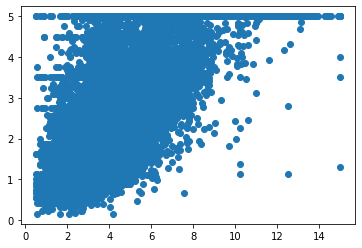

In [121]:
_= plt.scatter(df_temp['MedInc'], df_temp['MedHouseVal'])

In [122]:
ocs = OneClassSVM()
print(ocs.get_params())

{'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'nu': 0.5, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [123]:
ocs.fit(df_temp)

OneClassSVM()

In [124]:
out_pred = ocs.predict(df_temp)

In [125]:
df_temp['out'] = out_pred

In [126]:
df_temp.head()

,MedInc,MedHouseVal,out
0,8.3252,4.526,-1
1,8.3014,3.585,-1
2,7.2574,3.521,-1
3,5.6431,3.413,-1
4,3.8462,3.422,-1


In [127]:
df_out = df_temp[df_temp['out'] == -1]
df_out.head()

,MedInc,MedHouseVal,out
0,8.3252,4.526,-1
1,8.3014,3.585,-1
2,7.2574,3.521,-1
3,5.6431,3.413,-1
4,3.8462,3.422,-1


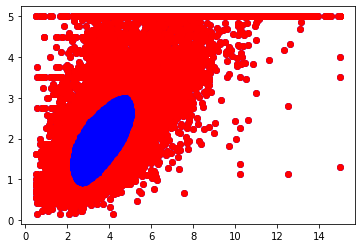

In [128]:
_ = plt.scatter(df_temp['MedInc'], df_temp['MedHouseVal'], color='blue')
_ = plt.scatter(df_out['MedInc'], df_out['MedHouseVal'], color='red')

In [129]:
def testar_out(df, gamma='scale', nu=0.5):
    df_temp = df.copy()
    ocs = OneClassSVM(gamma=gamma, nu=nu)
    print(ocs.get_params())
    ocs.fit(df_temp)
    out_pred = ocs.predict(df_temp)
    
    df_temp['out'] = out_pred
    df_out = df_temp[df_temp['out'] == -1]
    
    _ = plt.scatter(df_temp['MedInc'], df_temp['MedHouseVal'], color='blue')
    _ = plt.scatter(df_out['MedInc'], df_out['MedHouseVal'], color='red')

{'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'nu': 0.5, 'shrinking': True, 'tol': 0.001, 'verbose': False}


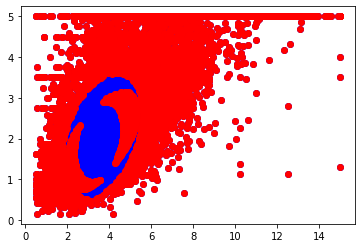

In [130]:
testar_out(df_temp)

{'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'nu': 0.8, 'shrinking': True, 'tol': 0.001, 'verbose': False}


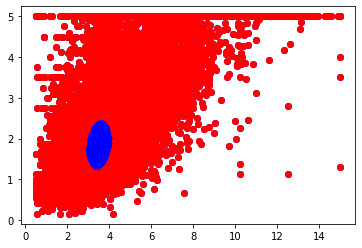

In [131]:
testar_out(df_temp, nu=0.8)

{'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'nu': 0.2, 'shrinking': True, 'tol': 0.001, 'verbose': False}


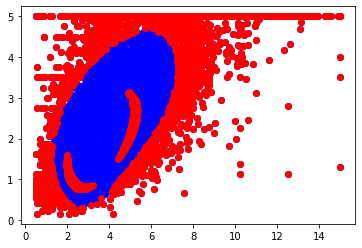

In [133]:
testar_out(df_temp, nu=0.2)

{'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'nu': 0.1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


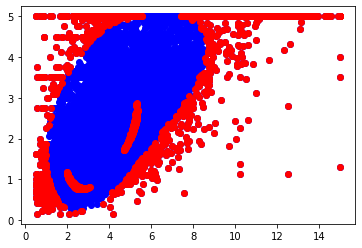

In [139]:
testar_out(df_temp, nu=0.1)

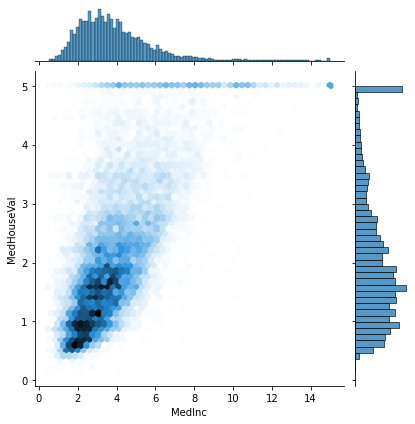

In [138]:
_ = sns.jointplot(data=df_temp, x='MedInc', y='MedHouseVal', kind='hex')

**Exercício**
Com os dados do arquivo `Admission_Predict.csv` realize uma classificação dos alunos que possuem chance maior que 0.8 de admissão e dos que possuem chance menor que 0.8. Compare diversos modelos e determine qual seria o melhor a ser implementado.
Agora inclusive o SVM.
  
https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

Um pouco mais
- A new contextual version of Support Vector Machine based on hyperplane translation, 2013
    - https://ieeexplore.ieee.org/document/6723486  
Support Vector Machine (SVM) é um método amplamente utilizado para classificação de imagens. A formulação original deste método não incorpora informações contextuais. Este estudo traz uma nova perspectiva sobre SVM contextual. A ideia principal da proposta apresentada consiste em traduzir, individualmente para cada pixel utilizando a sua informação contextual, o hiperplano de separação originalmente concebido pelo SVM. Um estudo de caso usando a imagem ALOS PALSAR mostra que o método proposto produz melhores resultados que o SVM tradicional.
- Multiplicadores de Lagrange